In [2]:

%load_ext autoreload
%autoreload

import os, sys

modules = os.path.abspath(os.path.join("..", "src"))
sys.path.append(modules)

import nlp_utils, keywords_utils, load_utils, run_analysis
from config import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/msalvetti/notebooks_2/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2026-02-23 14:11:42.819242: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Load data and run analysis

In [4]:
run_path = CHUNK_DIR + "run_id=2025-11-21/parsed/"
lf = load_utils.load_parquets(run_path)

File ARGUS_chunk_p183.parquet is corrupted


In [5]:
lf.head().collect(engine="streaming")

ID,dl_rank,dl_slot,alias,error,redirect,start_page,url,timestamp,title,description,keywords,language,links,html_path,text
str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""CHCHE102764474""",0,"""wistra.ch""","""""","""None""","""False""","""https://wistra.ch""","""https://wistra.ch""","""Fri Nov 21 21:07:28 2025""","""One moment, please... Loader""","""""","""""","""en""","""[""""]""","""/home/msalvetti/KOFScraper/chu…","""Loader Please wait while your …"
"""CHCHE113234944""",0,"""sitterwerk.ch""","""""","""None""","""False""","""https://sitterwerk.ch""","""https://sitterwerk.ch""","""Fri Nov 21 21:07:34 2025""","""Stiftung Sitterwerk • Stiftung…","""de de""","""""","""de""","""["""", ""sitterwerk-katalog.ch""]""","""/home/msalvetti/KOFScraper/chu…","""Anmelden {{['Stiftung Sitterwe…"
"""CHCHE108781264""",0,"""chrysalide.ch""","""""","""HttpError('Ignoring non-200 re…","""""","""https://chrysalide.ch""","""""","""Fri Nov 21 21:07:42 2025""","""""","""""","""""","""""","""[""""]""","""""",""""""
"""CHCHE395751997""",0,"""kbarchitekten.ch""","""""","""HttpError('Ignoring non-200 re…","""""","""https://kbarchitekten.ch""","""""","""Fri Nov 21 21:07:51 2025""","""""","""""","""""","""""","""[""""]""","""""",""""""
"""CHCHE106846438""",0,"""ugitech.com""","""""","""IgnoreRequest('Forbidden by ro…","""""","""https://ugitech.com""","""""","""Fri Nov 21 21:07:52 2025""","""""","""""","""""","""""","""[""""]""","""""",""""""


In [3]:
errors = run_analysis.compute_errors_percent(lf)

In [10]:
subpage_counts = run_analysis.get_subpage_counts(lf)

In [12]:
subpages = subpage_counts.select(pl.col("count").mean()).item()

In [18]:
timestamps = lf.select(
    pl.col('timestamp')
    .drop_nulls()
    .str.to_datetime(format="%a %b %d %H:%M:%S %Y")
).collect()

time_stats = timestamps.select(
    pl.min("timestamp").alias("start_time"),
    pl.max("timestamp").alias("end_time")
)
start_time = time_stats.item(0, "start_time")
end_time = time_stats.item(0, "end_time")

n_companies = lf.select(pl.col("ID").n_unique()).collect(engine = "streaming").item()

Scrape started on 2025-11-21 16:36:07

Number of companies in the input file: 74953
Scraped 52592 company websites in 11:10:05

Top 5 errors: 
shape: (5, 3)
┌─────────────────────────────────┬───────┬─────────┐
│ error                           ┆ count ┆ percent │
│ ---                             ┆ ---   ┆ ---     │
│ str                             ┆ u32   ┆ f64     │
╞═════════════════════════════════╪═══════╪═════════╡
│ None                            ┆ 45493 ┆ 67.65   │
│ HttpError('Ignoring non-200 re… ┆ 11099 ┆ 16.5    │
│ TimeoutError('')                ┆ 2216  ┆ 3.3     │
│ ResponseNeverReceived([<twiste… ┆ 1074  ┆ 1.6     │
│ ResponseNeverReceived([<twiste… ┆ 963   ┆ 1.43    │
└─────────────────────────────────┴───────┴─────────┘
Average number of subpages: 33.96

Number of spiders: 200
Subpage limit: 50
Input file: /home/msalvetti/KOFScraper/url_panel_70k.csv

Output written to: 
/home/msalvetti/KOFScraper/chunks/run_id=2025-11-21/parsed/parsed/

Full html code in 
/home/ms

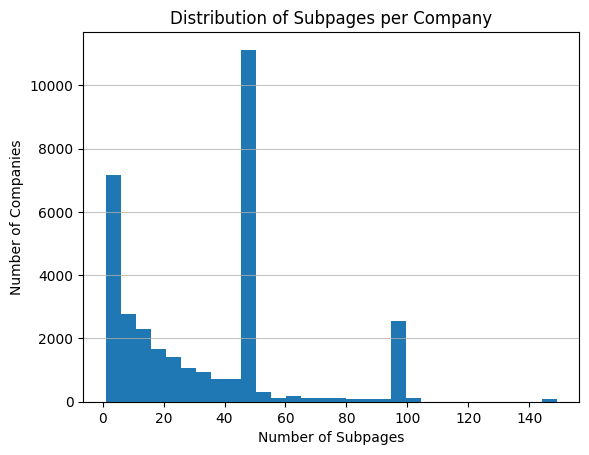

In [25]:
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/msalvetti/KOFScraper/")

from ARGUS_noGUI import argus_settings

input_file = "/home/msalvetti/KOFScraper/url_panel_70k.csv"
i_f = pl.scan_csv(input_file)

print(f"Scrape started on {start_time}\n")

print(f"Number of companies in the input file: {i_f.select(pl.len()).collect().item()}")
print(f"Scraped {n_companies} company websites in {end_time - start_time}\n")


print(f"Top 5 errors: \n{errors.head()}")    
print(f"Average number of subpages: {subpages:.2f}\n")
print(f"Number of spiders: {argus_settings.n_cores}")
print(f"Subpage limit: {argus_settings.limit}")

print(f"Input file: {input_file}\n")
parsed = run_path + "parsed/"
raw = run_path + "raw/"
print(f"Output written to: \n{parsed}\n\nFull html code in \n{raw}")

plt.hist(subpage_counts.get_column("count").to_numpy(), bins=30)

plt.title("Distribution of Subpages per Company")
plt.xlabel("Number of Subpages")
plt.ylabel("Number of Companies")
plt.grid(axis='y', alpha=0.75)
plt.show()